# 🪙 1. Imports and Data Loading

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("C:/Users/ajinv/Downloads/Gold_data.csv", header=None)
df.head()

,0,1,2,3,4,5,6
0,2023.01.16,8:00,1919.31,1920.65,1913.17,1915.60,5039
1,2023.01.16,9:00,1915.60,1917.40,1913.42,1916.97,5956
2,2023.01.16,10:00,1916.93,1916.93,1910.64,1911.52,7548
3,2023.01.16,11:00,1911.54,1917.70,1911.37,1917.38,5258
4,2023.01.16,12:00,1917.38,1917.61,1914.59,1915.42,4033


## 🧹 2. Initial Cleaning and Column Setup

In [3]:
df.columns = ['date','time','open','high','low','close','volume']
df.head()

,date,time,open,high,low,close,volume
0,2023.01.16,8:00,1919.31,1920.65,1913.17,1915.60,5039
1,2023.01.16,9:00,1915.60,1917.40,1913.42,1916.97,5956
2,2023.01.16,10:00,1916.93,1916.93,1910.64,1911.52,7548
3,2023.01.16,11:00,1911.54,1917.70,1911.37,1917.38,5258
4,2023.01.16,12:00,1917.38,1917.61,1914.59,1915.42,4033


In [4]:
df.isnull().sum()

date      0
time      0
open      0
high      0
low       0
close     0
volume    0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    4000 non-null   object 
 1   time    4000 non-null   object 
 2   open    4000 non-null   float64
 3   high    4000 non-null   float64
 4   low     4000 non-null   float64
 5   close   4000 non-null   float64
 6   volume  4000 non-null   int64  
dtypes: float64(4), int64(1), object(2)
memory usage: 218.9+ KB


## 📈 3. Visualize Price Time Series

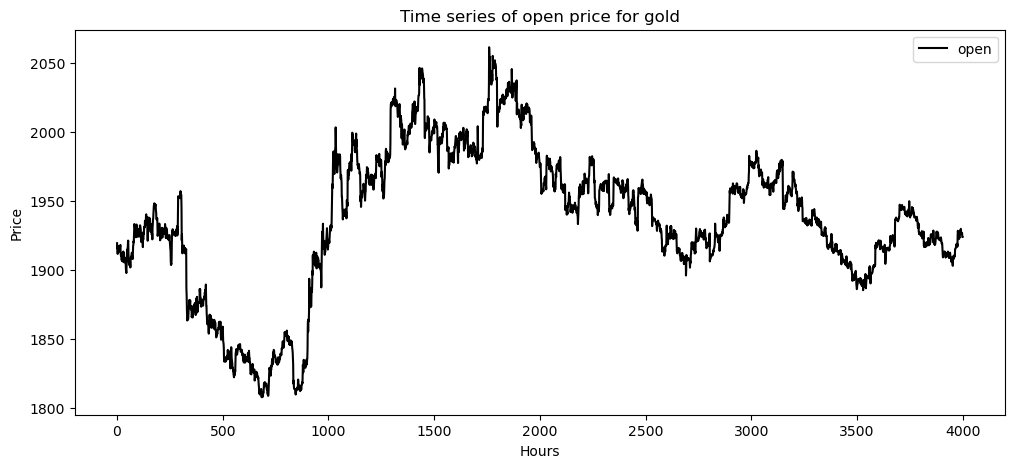

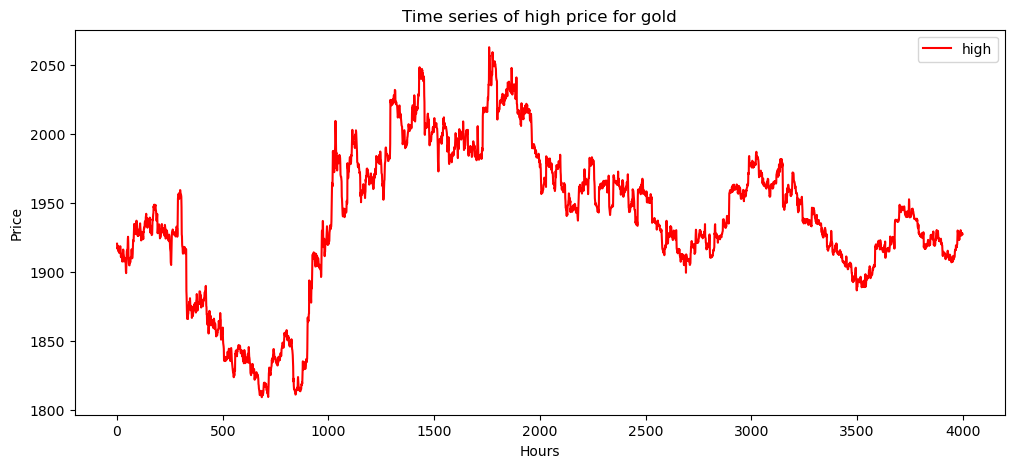

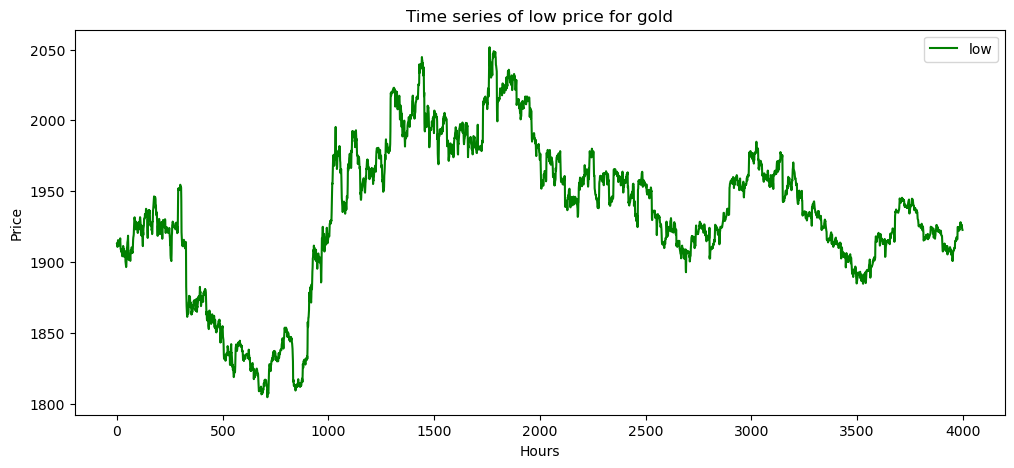

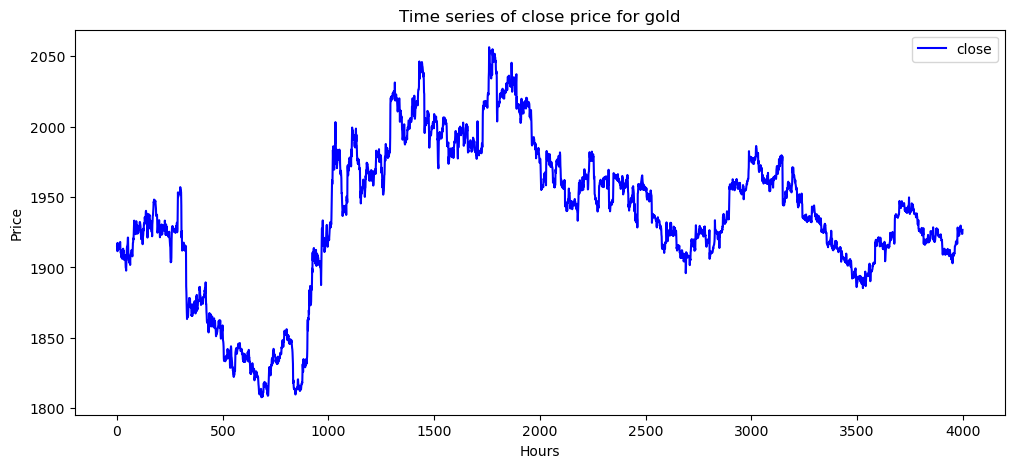

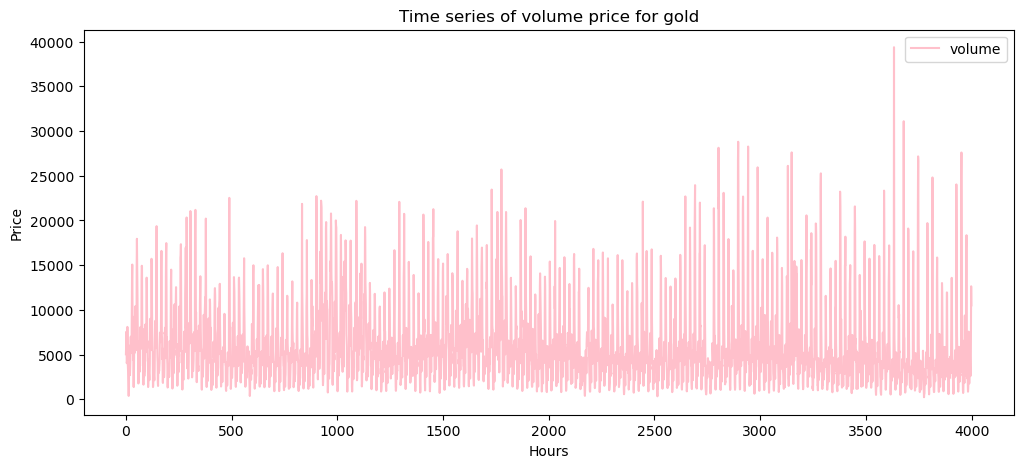

In [6]:
color_price = ['black','red','green','blue','pink']
for i in range(5):
    plt.figure(figsize=(12,5))
    plt.plot(range(len(df)), df[df.columns[i+2]], color=color_price[i], label=df.columns[i+2])
    plt.legend()
    plt.title('Time series of ' + df.columns[i+2] + ' price for gold')
    plt.xlabel('Hours')
    plt.ylabel('Price')
    plt.show()

## 🚨 4. Outlier Detection in 'Open' Price

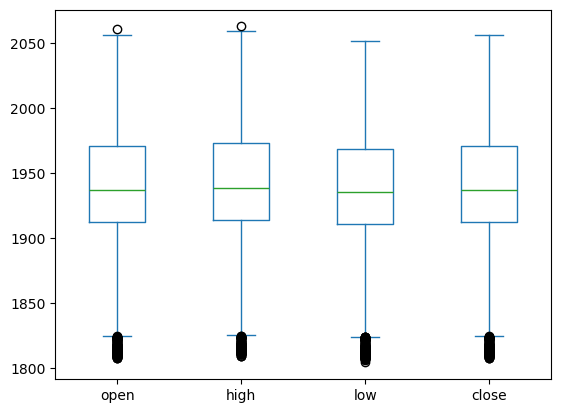

In [7]:
df.iloc[:,2:6].plot(kind='box')
plt.show()

In [8]:
q1, q2, q3 = df['open'].quantile([0.25, 0.5, 0.75])

In [9]:
d = q3 - q1
d

58.592499999999745

In [10]:
upper_bound = q3 + 1.5*d
lower_bound = q1 - 1.5*d
print(upper_bound)
print(lower_bound)

2058.9462499999995
1824.5762500000005


In [11]:
df[df['open'] > upper_bound]

,date,time,open,high,low,close,volume
1760,2023.05.04,1:00,2061.29,2062.96,2043.68,2056.46,7393


## ✂️ 5. Train-Test Split

In [12]:
df_new = df['open']
train = df_new[:int(len(df) * 0.7)]
test = df_new[int(len(df) * 0.7):]
print(len(train))
print(len(test))

2800
1200


## 🏗️ 6. Build Sequences for Training

In [13]:
n_past = 45
n_future = 1
timesample = len(train) - (n_past + n_future) - 1
x_train, y_train = [], []

for i in range(timesample):
    x_train.append(train[i:i+n_past])
    y_train.append(train[i+n_past:i+n_past+n_future])

x_train, y_train = np.array(x_train), np.array(y_train)
print('number of x_train: {} and shape of x_train: {}'.format(len(x_train), x_train.shape))
print('number of y_train: {} and shape of y_train: {}'.format(len(y_train), y_train.shape))

number of x_train: 2753 and shape of x_train: (2753, 45)
number of y_train: 2753 and shape of y_train: (2753, 1)


## 📦 7. Build Sequences for Testing

In [14]:
timesample_test = len(test) - (n_past + n_future) - 1
x_test, y_test = [], []

for i in range(timesample_test):
    x_test.append(test[i:i+n_past])
    y_test.append(test[i+n_past:i+n_past+n_future])

x_test, y_test = np.array(x_test), np.array(y_test)
print('number of x_test: {} and shape of x_test: {}'.format(len(x_test), x_test.shape))
print('number of y_test: {} and shape of y_test: {}'.format(len(y_test), y_test.shape))

number of x_test: 1153 and shape of x_test: (1153, 45)
number of y_test: 1153 and shape of y_test: (1153, 1)


## 🤖 8. Train Linear Regression Model

In [15]:
from sklearn.linear_model import LinearRegression

In [16]:
reg = LinearRegression()

In [17]:
reg.fit(x_train, y_train)

LinearRegression()

In [18]:
y_pred = reg.predict(x_test)
y_pred

array([[1922.86467285],
       [1924.98630296],
       [1925.77034984],
       ...,
       [1925.8924051 ],
       [1926.76328067],
       [1926.24863209]])

## 📉 9. Evaluate Predictions

In [19]:
from sklearn import metrics
metrics.mean_squared_error(y_test, y_pred)

5.675492800004129

## 📊 10. Visualize Real vs Predicted Prices

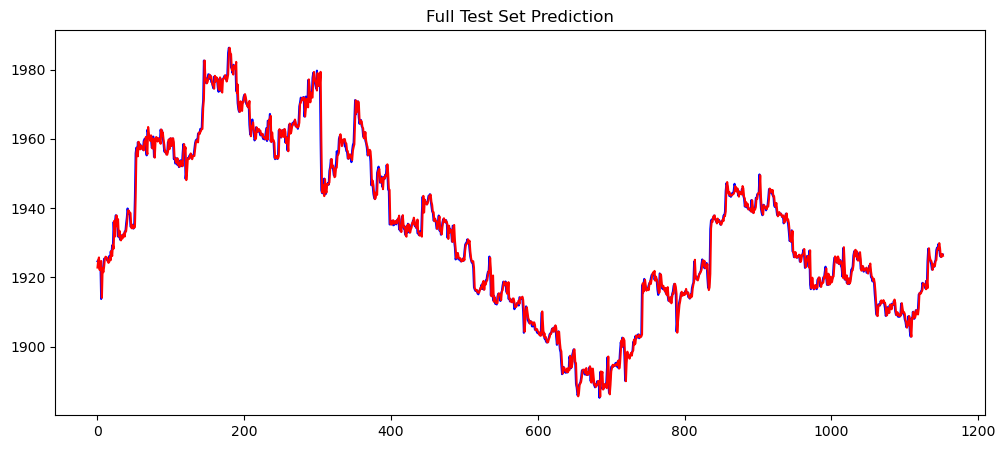

In [20]:
plt.figure(figsize=(12,5))
plt.plot(range(len(y_test)), y_test, color='b')
plt.plot(range(len(y_pred)), y_pred, color='r')
plt.title('Full Test Set Prediction')
plt.show()

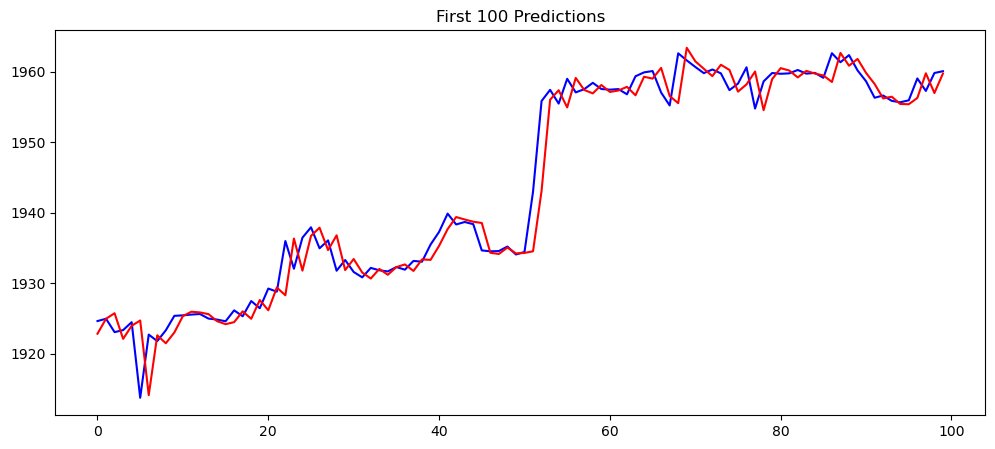

In [21]:
plt.figure(figsize=(12,5))
plt.plot(range(100), y_test[:100], color='b')
plt.plot(range(100), y_pred[:100], color='r')
plt.title('First 100 Predictions')
plt.show()

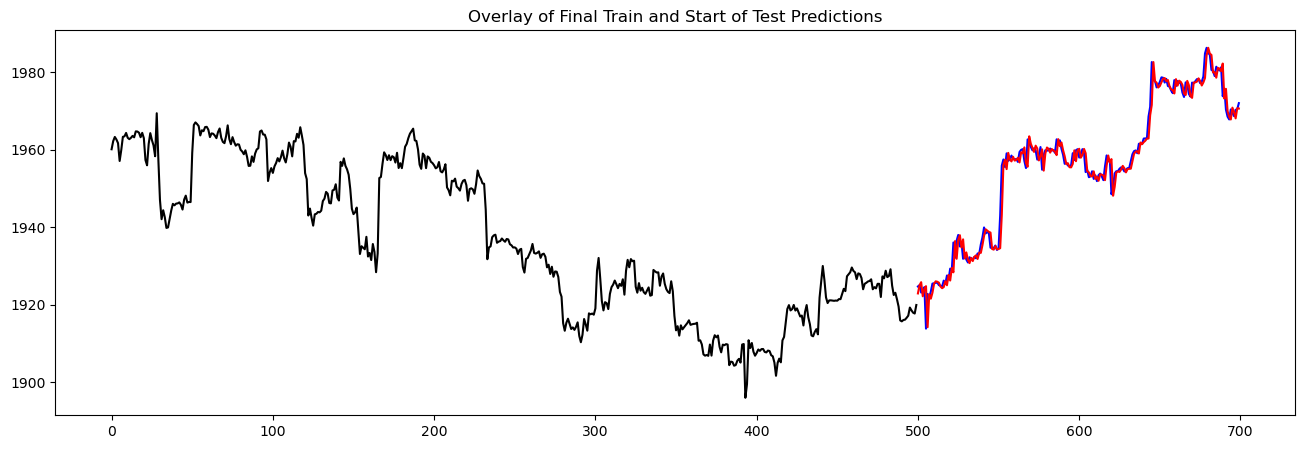

In [22]:
plt.figure(figsize=(16,5))
plt.plot(range(500), y_train[-500:], color='black')
plt.plot(range(500,700), y_test[:200], color='b')
plt.plot(range(500,700), y_pred[:200], color='r')
plt.title('Overlay of Final Train and Start of Test Predictions')
plt.show()